In [1]:
import customtkinter as ctk
from tkinter import Tk

# GUI main app

## Option 1: Sidebar with Vertical Tabs

Tabs on the left, content on the right.


In [ ]:
# Corrected main_app.py for Vertical Tabs

import customtkinter as ctk
from tkinter import Tk

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class MainApp:
    def __init__(self):
        self.root = Tk()
        self.root.title("Permeation Analysis Tool - Vertical Tabs")
        self.root.geometry("1000x600")
        
        # Sidebar
        self.sidebar = ctk.CTkFrame(self.root, width=200, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Options
        self.label = ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=20, weight="bold"))
        self.label.pack(pady=20)
        
        self.ui_scaling = ctk.CTkComboBox(self.sidebar, values=["80%", "90%", "100%", "110%", "120%"], state="readonly")
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=10)
        
        # Vertical Tabs
        self.tab_frame = ctk.CTkFrame(self.root)
        self.tab_frame.pack(side="left", fill="both", expand=True)
        
        self.tabs = ctk.CTkSegmentedButton(self.tab_frame, values=["Constant Diffusivity", "Variable FVT"], command=self.switch_tab)
        self.tabs.pack(fill="x")
        
        self.constant_diff_tab = ctk.CTkFrame(self.tab_frame)
        self.variable_fvt_tab = ctk.CTkFrame(self.tab_frame)
        
        ctk.CTkLabel(self.constant_diff_tab, text="Constant Diffusivity Model").pack(pady=20)
        ctk.CTkLabel(self.variable_fvt_tab, text="Variable FVT Model").pack(pady=20)
        
        # Start with the first tab visible
        self.constant_diff_tab.pack(fill="both", expand=True)
        self.current_tab = self.constant_diff_tab
    
    def switch_tab(self, value):
        # Hide current tab
        self.current_tab.pack_forget()
        
        # Show selected tab
        if value == "Constant Diffusivity":
            self.constant_diff_tab.pack(fill="both", expand=True)
            self.current_tab = self.constant_diff_tab
        else:
            self.variable_fvt_tab.pack(fill="both", expand=True)
            self.current_tab = self.variable_fvt_tab
    
    def run(self):
        self.root.mainloop()

# Run the application in Jupyter
app = MainApp()
app.run()


## Option 2: Horizontal Tabs with Sidebar

### Initial Design

In [ ]:
# main_window.py for Horizontal Tabs

class MainWindow(ctk.CTk):
    def __init__(self):
        super().__init__()

        self.title("Permeation Analysis Tool - Horizontal Tabs")
        self.geometry("1000x600")
        
        # Sidebar
        self.sidebar = ctk.CTkFrame(self, width=200, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkComboBox(self.sidebar, values=["80%", "90%", "100%", "110%", "120%"], state="readonly").pack(pady=10)
        
        # Horizontal Tabs
        self.tabview = ctk.CTkTabview(self, width=800, height=600)
        self.tabview.pack(side="top", fill="both", expand=True)
        
        tab1 = self.tabview.add("Constant Diffusivity")
        tab2 = self.tabview.add("Variable FVT")
        
        ctk.CTkLabel(tab1, text="Constant Diffusivity Model").pack(pady=20)
        ctk.CTkLabel(tab2, text="Variable FVT Model").pack(pady=20)

# Run the application in Jupyter
window = MainWindow()
window.mainloop()


### Detailed UI

In [12]:
# Enhanced Option 2: Mode Switching with UI Scaling and Theme at Bottom

import customtkinter as ctk
from tkinter import Tk, StringVar

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=20)
        
        # App Name Input
        ctk.CTkLabel(self.sidebar, text="App Name:").pack(pady=5)
        self.app_name_entry = ctk.CTkEntry(self.sidebar, placeholder_text="Permeation Analysis Tool")
        self.app_name_entry.pack(pady=5)
        
        # Mode Selector
        ctk.CTkLabel(self.sidebar, text="Mode:").pack(pady=5)
        self.mode_var = StringVar(value="Manual")
        self.manual_mode_button = ctk.CTkRadioButton(self.sidebar, text="Manual", variable=self.mode_var, value="Manual", command=self.switch_mode)
        self.manual_mode_button.pack(pady=2)
        self.fitting_mode_button = ctk.CTkRadioButton(self.sidebar, text="Fitting", variable=self.mode_var, value="Fitting", command=self.switch_mode)
        self.fitting_mode_button.pack(pady=2)
        
        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Horizontal Tabs
        self.tabview = ctk.CTkTabview(self.main_frame)
        self.tabview.pack(fill="both", expand=True)
        
        # Add Tabs
        self.tab_constant_diff = self.tabview.add("Constant Diffusivity")
        self.tab_variable_fvt = self.tabview.add("Variable FVT")
        
        # Placeholder Content for Tabs
        self.add_placeholder_content()
        
    def add_placeholder_content(self):
        # ========== Constant Diffusivity Tab Content ==========
        # Manual Mode
        self.manual_constant_diff = ctk.CTkFrame(self.tab_constant_diff)
        ctk.CTkLabel(self.manual_constant_diff, text="Manual Mode - Constant Diffusivity", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkLabel(self.manual_constant_diff, text="Set parameters manually and see the results.").pack(pady=10)
        ctk.CTkButton(self.manual_constant_diff, text="Generate Results", command=lambda: print("Manual - Constant Diffusivity")).pack(pady=10)
        
        # Fitting Mode
        self.fitting_constant_diff = ctk.CTkFrame(self.tab_constant_diff)
        ctk.CTkLabel(self.fitting_constant_diff, text="Fitting Mode - Constant Diffusivity", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkLabel(self.fitting_constant_diff, text="Select files and set fitting options.").pack(pady=10)
        ctk.CTkButton(self.fitting_constant_diff, text="Start Fitting", command=lambda: print("Fitting - Constant Diffusivity")).pack(pady=10)
        
        # Default to Manual Mode
        self.manual_constant_diff.pack(fill="both", expand=True)
        self.current_constant_diff = self.manual_constant_diff
        
        # ========== Variable FVT Tab Content ==========
        # Manual Mode
        self.manual_variable_fvt = ctk.CTkFrame(self.tab_variable_fvt)
        ctk.CTkLabel(self.manual_variable_fvt, text="Manual Mode - Variable FVT", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkLabel(self.manual_variable_fvt, text="Set parameters manually and see the results.").pack(pady=10)
        ctk.CTkButton(self.manual_variable_fvt, text="Generate Results", command=lambda: print("Manual - Variable FVT")).pack(pady=10)
        
        # Fitting Mode
        self.fitting_variable_fvt = ctk.CTkFrame(self.tab_variable_fvt)
        ctk.CTkLabel(self.fitting_variable_fvt, text="Fitting Mode - Variable FVT", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkLabel(self.fitting_variable_fvt, text="Select files and set fitting options.").pack(pady=10)
        ctk.CTkButton(self.fitting_variable_fvt, text="Start Fitting", command=lambda: print("Fitting - Variable FVT")).pack(pady=10)
        
        # Default to Manual Mode
        self.manual_variable_fvt.pack(fill="both", expand=True)
        self.current_variable_fvt = self.manual_variable_fvt
    
    def switch_mode(self):
        mode = self.mode_var.get()
        
        # Constant Diffusivity
        self.current_constant_diff.pack_forget()
        if mode == "Manual":
            self.manual_constant_diff.pack(fill="both", expand=True)
            self.current_constant_diff = self.manual_constant_diff
        else:
            self.fitting_constant_diff.pack(fill="both", expand=True)
            self.current_constant_diff = self.fitting_constant_diff
        
        # Variable FVT
        self.current_variable_fvt.pack_forget()
        if mode == "Manual":
            self.manual_variable_fvt.pack(fill="both", expand=True)
            self.current_variable_fvt = self.manual_variable_fvt
        else:
            self.fitting_variable_fvt.pack(fill="both", expand=True)
            self.current_variable_fvt = self.fitting_variable_fvt
    
    def update_scaling(self, value):
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        self.root.mainloop()

# Run the application
app = PermeationAnalysisApp()
app.run()


### Integrate Mode and Model selection

#### Base

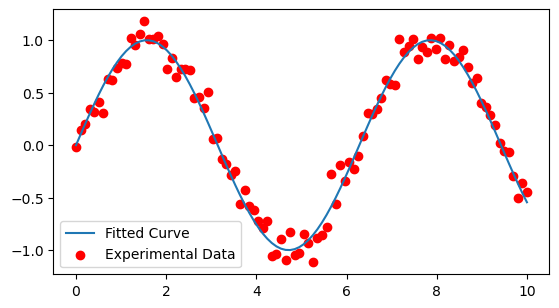

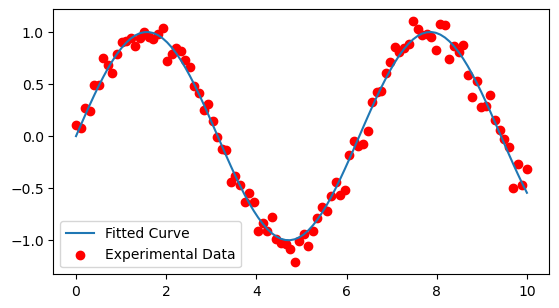

In [2]:
import customtkinter as ctk
from tkinter import Tk, StringVar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=20)
        
        # App Name Input
        ctk.CTkLabel(self.sidebar, text="App Name:").pack(pady=5)
        self.app_name_entry = ctk.CTkEntry(self.sidebar, placeholder_text="Permeation Analysis Tool")
        self.app_name_entry.pack(pady=5)
        
        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Horizontal Tabs
        self.tabview = ctk.CTkTabview(self.main_frame, command=self.tab_clicked)
        self.tabview.pack(fill="both", expand=True)
        
        # Add Tabs for Models
        self.tab_constant_diff = self.tabview.add("Constant Diffusivity")
        self.tab_variable_fvt = self.tabview.add("Variable FVT")
        
        # Initialize Tab States
        self.tab_states = {
            "Constant Diffusivity": {"mode": "Manual"},
            "Variable FVT": {"mode": "Manual"}
        }
        
        # Initialize Tab Content
        self.add_tab_content(self.tab_constant_diff, "Constant Diffusivity")
        self.add_tab_content(self.tab_variable_fvt, "Variable FVT")
    
    def add_tab_content(self, tab, model_name):
        # Frame Containers for Dynamic Content
        manual_frame = ctk.CTkFrame(tab)
        fitting_frame = ctk.CTkFrame(tab)
        
        # Manual Mode Content
        ctk.CTkLabel(manual_frame, text=f"Manual Mode - {model_name}", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkButton(manual_frame, text="Generate Results", command=lambda: print(f"Manual Mode - {model_name}")).pack(pady=10)
        
        # Fitting Mode Content
        ctk.CTkLabel(fitting_frame, text=f"Fitting Mode - {model_name}", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        results_text = ctk.CTkTextbox(fitting_frame, width=300, height=200)
        results_text.insert("0.0", "Fitting Results:\n- Parameter 1: 0.123\n- Parameter 2: 0.456\n- R²: 0.987")
        results_text.configure(state="disabled")
        results_text.pack(pady=10)
        
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="Fitted Curve")
        ax.scatter(x, y + np.random.normal(0, 0.1, len(x)), color="red", label="Experimental Data")
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=fitting_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)
        
        fitting_status = ctk.CTkProgressBar(fitting_frame, orientation="horizontal", mode="determinate")
        fitting_status.set(0.8)
        fitting_status.pack(fill="x", pady=10)
        
        # Store Frames
        tab.frames = {"Manual": manual_frame, "Fitting": fitting_frame}
        
        # Initial Mode
        self.switch_mode(tab, model_name, "Manual")
    
    def tab_clicked(self):
        tab_name = self.tabview.get()
        
        # Find the Tab Widget
        if tab_name == "Constant Diffusivity":
            tab = self.tab_constant_diff
        elif tab_name == "Variable FVT":
            tab = self.tab_variable_fvt
        else:
            return  # Exit if tab not found
        
        # Check if the tab was previously selected
        if tab_name in self.tab_states:
            # Toggle Mode
            current_mode = self.tab_states[tab_name]["mode"]
            new_mode = "Fitting" if current_mode == "Manual" else "Manual"
            self.tab_states[tab_name]["mode"] = new_mode
        else:
            # First time tab is clicked, default to Manual mode
            self.tab_states[tab_name] = {"mode": "Manual"}
            new_mode = "Manual"
        
        # Switch Mode
        self.switch_mode(tab, tab_name, new_mode)
    
    def switch_mode(self, tab, model_name, mode):
        if hasattr(tab, 'current_frame'):
            tab.current_frame.pack_forget()
        tab.frames[mode].pack(fill="both", expand=True)
        tab.current_frame = tab.frames[mode]
    
    def update_scaling(self, value):
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        self.root.mainloop()

# Run the application
app = PermeationAnalysisApp()
app.run()

#### Iteration 1

Successfully switched to Manual mode for Constant Diffusivity
Successfully switched to Manual mode for Variable FVT
Removing current frame for Variable FVT
Successfully switched to Manual mode for Variable FVT
Setting Variable FVT to Manual mode
Removing current frame for Constant Diffusivity
Successfully switched to Manual mode for Constant Diffusivity
Setting Constant Diffusivity to Manual mode
Removing current frame for Variable FVT
Successfully switched to Manual mode for Variable FVT
Setting Variable FVT to Manual mode
Removing current frame for Constant Diffusivity
Successfully switched to Manual mode for Constant Diffusivity
Setting Constant Diffusivity to Manual mode
Removing current frame for Variable FVT
Successfully switched to Manual mode for Variable FVT
Setting Variable FVT to Manual mode


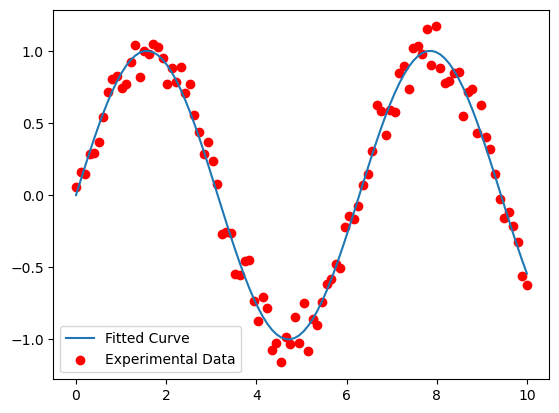

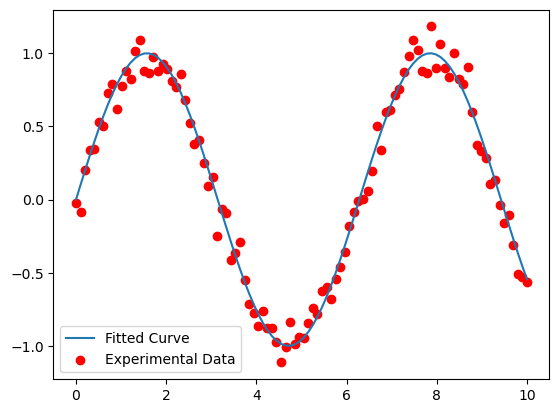

In [11]:
import customtkinter as ctk
from tkinter import Tk, StringVar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=20)
        
        # App Name Input
        ctk.CTkLabel(self.sidebar, text="App Name:").pack(pady=5)
        self.app_name_entry = ctk.CTkEntry(self.sidebar, placeholder_text="Permeation Analysis Tool")
        self.app_name_entry.pack(pady=5)
        
        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], 
                                         state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Track last selected tab
        self.last_selected_tab = None
        
        # Horizontal Tabs
        self.tabview = ctk.CTkTabview(self.main_frame)
        self.tabview.pack(fill="both", expand=True)
        
        # Add Tabs for Models
        self.tab_constant_diff = self.tabview.add("Constant Diffusivity")
        self.tab_variable_fvt = self.tabview.add("Variable FVT")
        
        # Bind tab selection event
        self.tabview._segmented_button.configure(command=self.handle_tab_selection)
        
        # Initialize Tab States
        self.tab_states = {
            "Constant Diffusivity": {"mode": "Manual"},
            "Variable FVT": {"mode": "Manual"}
        }
        
        # Initialize Tab Content
        self.add_tab_content(self.tab_constant_diff, "Constant Diffusivity")
        self.add_tab_content(self.tab_variable_fvt, "Variable FVT")
    
    def add_tab_content(self, tab, model_name):
        # Frame Containers for Dynamic Content
        manual_frame = ctk.CTkFrame(tab)
        fitting_frame = ctk.CTkFrame(tab)
        
        # Manual Mode Content
        ctk.CTkLabel(manual_frame, text=f"Manual Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkButton(manual_frame, text="Generate Results", 
                     command=lambda: print(f"Manual Mode - {model_name}")).pack(pady=10)
        
        # Fitting Mode Content
        ctk.CTkLabel(fitting_frame, text=f"Fitting Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        results_text = ctk.CTkTextbox(fitting_frame, width=300, height=200)
        results_text.insert("0.0", "Fitting Results:\n- Parameter 1: 0.123\n- Parameter 2: 0.456\n- R²: 0.987")
        results_text.configure(state="disabled")
        results_text.pack(pady=10)
        
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="Fitted Curve")
        ax.scatter(x, y + np.random.normal(0, 0.1, len(x)), color="red", label="Experimental Data")
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=fitting_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)
        
        fitting_status = ctk.CTkProgressBar(fitting_frame, orientation="horizontal", mode="determinate")
        fitting_status.set(0.8)
        fitting_status.pack(fill="x", pady=10)
        
        # Store Frames
        tab.frames = {"Manual": manual_frame, "Fitting": fitting_frame}
        
        # Initial Mode
        self.switch_mode(tab, model_name, "Manual")

    def handle_tab_selection(self, selected_tab):
        """Handle tab selection and mode switching"""
        # If clicking the currently selected tab, toggle mode
        if selected_tab == self.last_selected_tab:
            current_mode = self.tab_states[selected_tab]["mode"]
            new_mode = "Fitting" if current_mode == "Manual" else "Manual"
            self.tab_states[selected_tab]["mode"] = new_mode
            
            # Get corresponding tab widget
            tab = self.tab_constant_diff if selected_tab == "Constant Diffusivity" else self.tab_variable_fvt
            self.switch_mode(tab, selected_tab, new_mode)
            print(f"Toggling mode to {new_mode} for {selected_tab}")  # Debug print
            
        else:
            # First time selecting this tab
            tab = self.tab_constant_diff if selected_tab == "Constant Diffusivity" else self.tab_variable_fvt
            self.tab_states[selected_tab]["mode"] = "Manual"
            self.switch_mode(tab, selected_tab, "Manual")
            print(f"Setting {selected_tab} to Manual mode")  # Debug print
            
        self.last_selected_tab = selected_tab

    def switch_mode(self, tab, model_name, mode):
        """Switch between Manual and Fitting modes"""
        if hasattr(tab, 'current_frame'):
            print(f"Removing current frame for {model_name}")  # Debug print
            tab.current_frame.pack_forget()
        tab.frames[mode].pack(fill="both", expand=True)
        tab.current_frame = tab.frames[mode]
        print(f"Successfully switched to {mode} mode for {model_name}")  # Debug print
    
    def update_scaling(self, value):
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        self.root.mainloop()

# Run the application
if __name__ == "__main__":
    app = PermeationAnalysisApp()
    app.run()

### Toggle switch for Manual-Fitting mode

#### Iteration 1

Switched to Manual mode for Constant Diffusivity
Switched to Manual mode for Variable FVT
Switched to Fitting mode for Constant Diffusivity
Toggled to Fitting mode for Constant Diffusivity
Switched to Manual mode for Constant Diffusivity
Toggled to Manual mode for Constant Diffusivity
Switched to Fitting mode for Constant Diffusivity
Toggled to Fitting mode for Constant Diffusivity
Switched to Manual mode for Constant Diffusivity
Toggled to Manual mode for Constant Diffusivity
Switched to Fitting mode for Constant Diffusivity
Toggled to Fitting mode for Constant Diffusivity
Switched to Manual mode for Constant Diffusivity
Toggled to Manual mode for Constant Diffusivity
Switched to Fitting mode for Constant Diffusivity
Toggled to Fitting mode for Constant Diffusivity
Switched to Manual mode for Constant Diffusivity
Toggled to Manual mode for Constant Diffusivity
Switched to Fitting mode for Constant Diffusivity
Toggled to Fitting mode for Constant Diffusivity
Switched to Manual mode for

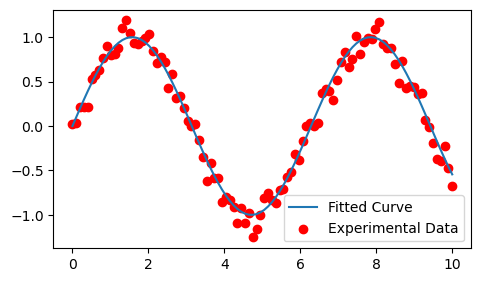

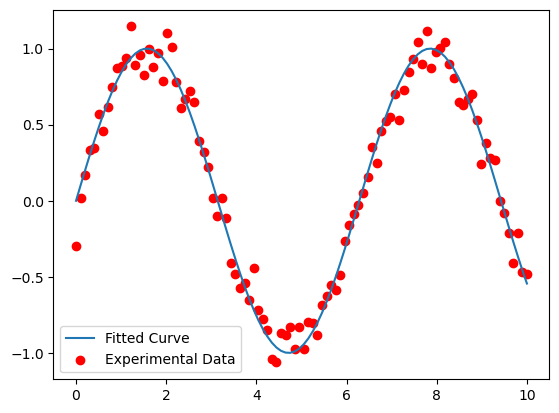

In [16]:
import customtkinter as ctk
from tkinter import Tk, StringVar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=20)
        
        # App Name Input
        ctk.CTkLabel(self.sidebar, text="App Name:").pack(pady=5)
        self.app_name_entry = ctk.CTkEntry(self.sidebar, placeholder_text="Permeation Analysis Tool")
        self.app_name_entry.pack(pady=5)
        
        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], 
                                         state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Create top control frame for tabs and mode switch
        self.top_control_frame = ctk.CTkFrame(self.main_frame)
        self.top_control_frame.pack(fill="x", padx=10, pady=5)
        
        # Mode Switch in top control frame
        self.mode_switch = ctk.CTkSwitch(
            self.top_control_frame, 
            text="Fitting Mode",
            command=self.toggle_mode
        )
        self.mode_switch.pack(side="right", padx=10)
        
        # Track last selected tab
        self.last_selected_tab = None
        
        # Horizontal Tabs
        self.tabview = ctk.CTkTabview(self.main_frame)
        self.tabview.pack(fill="both", expand=True)
        
        # Add Tabs for Models
        self.tab_constant_diff = self.tabview.add("Constant Diffusivity")
        self.tab_variable_fvt = self.tabview.add("Variable FVT")
        
        # Bind tab selection event
        self.tabview._segmented_button.configure(command=self.handle_tab_selection)
        
        # Initialize Tab States
        self.tab_states = {
            "Constant Diffusivity": {"mode": "Manual"},
            "Variable FVT": {"mode": "Manual"}
        }
        
        # Initialize Tab Content
        self.add_tab_content(self.tab_constant_diff, "Constant Diffusivity")
        self.add_tab_content(self.tab_variable_fvt, "Variable FVT")
    
    def add_tab_content(self, tab, model_name):
        # Frame Containers for Dynamic Content
        manual_frame = ctk.CTkFrame(tab)
        fitting_frame = ctk.CTkFrame(tab)
        
        # Manual Mode Content
        ctk.CTkLabel(manual_frame, text=f"Manual Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkButton(manual_frame, text="Generate Results", 
                     command=lambda: print(f"Manual Mode - {model_name}")).pack(pady=10)
        
        # Fitting Mode Content
        ctk.CTkLabel(fitting_frame, text=f"Fitting Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        results_text = ctk.CTkTextbox(fitting_frame, width=300, height=200)
        results_text.insert("0.0", "Fitting Results:\n- Parameter 1: 0.123\n- Parameter 2: 0.456\n- R²: 0.987")
        results_text.configure(state="disabled")
        results_text.pack(pady=10)
        
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="Fitted Curve")
        ax.scatter(x, y + np.random.normal(0, 0.1, len(x)), color="red", label="Experimental Data")
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=fitting_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)
        
        fitting_status = ctk.CTkProgressBar(fitting_frame, orientation="horizontal", mode="determinate")
        fitting_status.set(0.8)
        fitting_status.pack(fill="x", pady=10)
        
        # Store Frames
        tab.frames = {"Manual": manual_frame, "Fitting": fitting_frame}
        
        # Initial Mode
        self.switch_mode(tab, model_name, "Manual")

    def toggle_mode(self):
        """Toggle between Manual and Fitting modes using the switch"""
        current_tab = self.tabview.get()
        if not current_tab:
            return
            
        new_mode = "Fitting" if self.mode_switch.get() else "Manual"
        self.tab_states[current_tab]["mode"] = new_mode
        
        # Get corresponding tab widget
        tab = self.tab_constant_diff if current_tab == "Constant Diffusivity" else self.tab_variable_fvt
        self.switch_mode(tab, current_tab, new_mode)
        print(f"Toggled to {new_mode} mode for {current_tab}")

    def handle_tab_selection(self, selected_tab):
        """Handle tab selection and update mode switch"""
        # Update mode switch to match tab's current mode
        current_mode = self.tab_states[selected_tab]["mode"]
        self.mode_switch.select() if current_mode == "Fitting" else self.mode_switch.deselect()
        
        # Get corresponding tab widget
        tab = self.tab_constant_diff if selected_tab == "Constant Diffusivity" else self.tab_variable_fvt
        self.switch_mode(tab, selected_tab, current_mode)
        print(f"Selected {selected_tab} in {current_mode} mode")
        
        self.last_selected_tab = selected_tab

    def switch_mode(self, tab, model_name, mode):
        """Switch between Manual and Fitting modes"""
        if hasattr(tab, 'current_frame'):
            tab.current_frame.pack_forget()
        tab.frames[mode].pack(fill="both", expand=True)
        tab.current_frame = tab.frames[mode]
        print(f"Switched to {mode} mode for {model_name}")
    
    def update_scaling(self, value):
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        self.root.mainloop()

# Run the application
if __name__ == "__main__":
    app = PermeationAnalysisApp()
    app.run()

#### Iteration 2

Switched to Manual mode for Constant Diffusivity
Switched to Manual mode for Variable FVT
Switched to Manual mode for Variable FVT
Selected Variable FVT in Manual mode
Switched to Manual mode for Constant Diffusivity
Selected Constant Diffusivity in Manual mode
Switched to Manual mode for Variable FVT
Selected Variable FVT in Manual mode


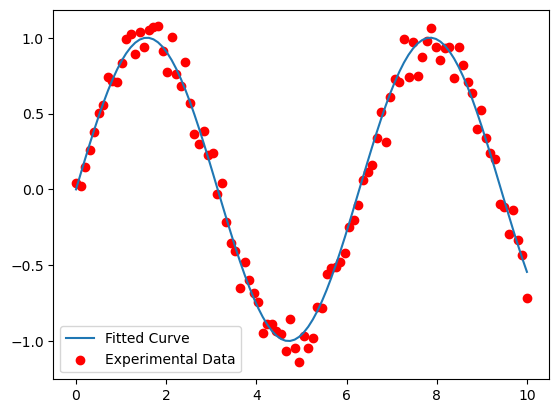

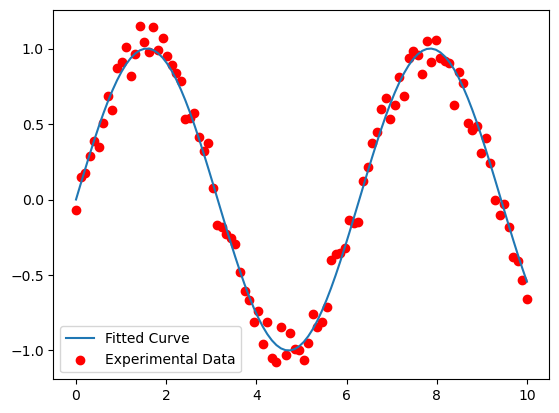

In [18]:
import customtkinter as ctk
from tkinter import Tk, StringVar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=20)
        
        # App Name Input
        ctk.CTkLabel(self.sidebar, text="App Name:").pack(pady=5)
        self.app_name_entry = ctk.CTkEntry(self.sidebar, placeholder_text="Permeation Analysis Tool")
        self.app_name_entry.pack(pady=5)
        
        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], 
                                         state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Create tab control frame to hold tabs and mode switch
        self.tab_control_frame = ctk.CTkFrame(self.main_frame)
        self.tab_control_frame.pack(fill="x", padx=10, pady=5)
        
        # Create container for tabview
        self.tabview_container = ctk.CTkFrame(self.tab_control_frame)
        self.tabview_container.pack(side="left", fill="x", expand=True)
        
        # Horizontal Tabs with fixed height
        self.tabview = ctk.CTkTabview(self.tabview_container, height=35)
        self.tabview.pack(side="left", fill="x", expand=True)
        
        # Mode Switch next to tabs
        self.mode_switch = ctk.CTkSwitch(
            self.tab_control_frame, 
            text="Fitting Mode",
            command=self.toggle_mode
        )
        self.mode_switch.pack(side="right", padx=10)
        
        # Track last selected tab
        self.last_selected_tab = None
        
        # Add Tabs for Models
        self.tab_constant_diff = self.tabview.add("Constant Diffusivity")
        self.tab_variable_fvt = self.tabview.add("Variable FVT")
        
        # Bind tab selection event
        self.tabview._segmented_button.configure(command=self.handle_tab_selection)
        
        # Initialize Tab States
        self.tab_states = {
            "Constant Diffusivity": {"mode": "Manual"},
            "Variable FVT": {"mode": "Manual"}
        }
        
        # Initialize Tab Content
        self.add_tab_content(self.tab_constant_diff, "Constant Diffusivity")
        self.add_tab_content(self.tab_variable_fvt, "Variable FVT")
    
    def add_tab_content(self, tab, model_name):
        # Frame Containers for Dynamic Content
        manual_frame = ctk.CTkFrame(tab)
        fitting_frame = ctk.CTkFrame(tab)
        
        # Manual Mode Content
        ctk.CTkLabel(manual_frame, text=f"Manual Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkButton(manual_frame, text="Generate Results", 
                     command=lambda: print(f"Manual Mode - {model_name}")).pack(pady=10)
        
        # Fitting Mode Content
        ctk.CTkLabel(fitting_frame, text=f"Fitting Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        results_text = ctk.CTkTextbox(fitting_frame, width=300, height=200)
        results_text.insert("0.0", "Fitting Results:\n- Parameter 1: 0.123\n- Parameter 2: 0.456\n- R²: 0.987")
        results_text.configure(state="disabled")
        results_text.pack(pady=10)
        
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="Fitted Curve")
        ax.scatter(x, y + np.random.normal(0, 0.1, len(x)), color="red", label="Experimental Data")
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=fitting_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)
        
        fitting_status = ctk.CTkProgressBar(fitting_frame, orientation="horizontal", mode="determinate")
        fitting_status.set(0.8)
        fitting_status.pack(fill="x", pady=10)
        
        # Store Frames
        tab.frames = {"Manual": manual_frame, "Fitting": fitting_frame}
        
        # Initial Mode
        self.switch_mode(tab, model_name, "Manual")

    def toggle_mode(self):
        """Toggle between Manual and Fitting modes using the switch"""
        current_tab = self.tabview.get()
        if not current_tab:
            return
            
        new_mode = "Fitting" if self.mode_switch.get() else "Manual"
        self.tab_states[current_tab]["mode"] = new_mode
        
        # Get corresponding tab widget
        tab = self.tab_constant_diff if current_tab == "Constant Diffusivity" else self.tab_variable_fvt
        self.switch_mode(tab, current_tab, new_mode)
        print(f"Toggled to {new_mode} mode for {current_tab}")

    def handle_tab_selection(self, selected_tab):
        """Handle tab selection and update mode switch"""
        if selected_tab != self.last_selected_tab:
            # Update mode switch to match tab's current mode
            current_mode = self.tab_states[selected_tab]["mode"]
            self.mode_switch.select() if current_mode == "Fitting" else self.mode_switch.deselect()
            
            # Get corresponding tab widget
            tab = self.tab_constant_diff if selected_tab == "Constant Diffusivity" else self.tab_variable_fvt
            self.switch_mode(tab, selected_tab, current_mode)
            print(f"Selected {selected_tab} in {current_mode} mode")
            
        self.last_selected_tab = selected_tab

    def switch_mode(self, tab, model_name, mode):
        """Switch between Manual and Fitting modes"""
        if hasattr(tab, 'current_frame'):
            tab.current_frame.pack_forget()
        tab.frames[mode].pack(fill="both", expand=True)
        tab.current_frame = tab.frames[mode]
        print(f"Switched to {mode} mode for {model_name}")
    
    def update_scaling(self, value):
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        self.root.mainloop()

# Run the application
if __name__ == "__main__":
    app = PermeationAnalysisApp()
    app.run()

## Option 3: Sidebar with Dropdown for Model Selection

### Iteration 1

In [19]:
# Option 3: Dropdown for Model Selection

import customtkinter as ctk
from tkinter import Tk

ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class DropdownApp:
    def __init__(self):
        self.root = Tk()
        self.root.title("Permeation Analysis Tool - Dropdown")
        self.root.geometry("1000x600")
        
        # Sidebar
        self.sidebar = ctk.CTkFrame(self.root, width=200, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        ctk.CTkLabel(self.sidebar, text="Settings", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        
        self.ui_scaling = ctk.CTkComboBox(self.sidebar, values=["80%", "90%", "100%", "110%", "120%"], state="readonly")
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=10)
        
        ctk.CTkLabel(self.sidebar, text="Select Model").pack(pady=10)
        
        self.model_selector = ctk.CTkComboBox(self.sidebar, values=["Constant Diffusivity", "Variable FVT"], state="readonly", command=self.switch_model)
        self.model_selector.set("Constant Diffusivity")
        self.model_selector.pack(pady=10)
        
        # Main Content Area
        self.content_frame = ctk.CTkFrame(self.root)
        self.content_frame.pack(side="right", fill="both", expand=True)
        
        self.constant_diff_frame = ctk.CTkFrame(self.content_frame)
        self.variable_fvt_frame = ctk.CTkFrame(self.content_frame)
        
        ctk.CTkLabel(self.constant_diff_frame, text="Constant Diffusivity Model").pack(pady=20)
        ctk.CTkLabel(self.variable_fvt_frame, text="Variable FVT Model").pack(pady=20)
        
        self.constant_diff_frame.pack(fill="both", expand=True)
        self.current_frame = self.constant_diff_frame
    
    def switch_model(self, value):
        self.current_frame.pack_forget()
        if value == "Constant Diffusivity":
            self.constant_diff_frame.pack(fill="both", expand=True)
            self.current_frame = self.constant_diff_frame
        else:
            self.variable_fvt_frame.pack(fill="both", expand=True)
            self.current_frame = self.variable_fvt_frame
    
    def run(self):
        self.root.mainloop()

# Run the application in Jupyter
app = DropdownApp()
app.run()


### Iteration 2

Switched to Manual mode for Constant Diffusivity
Switched to Manual mode for Variable FVT
Manual Mode - Variable FVT
Switched to Fitting mode for Variable FVT


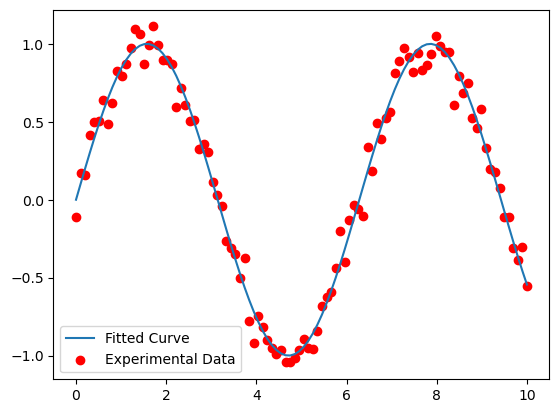

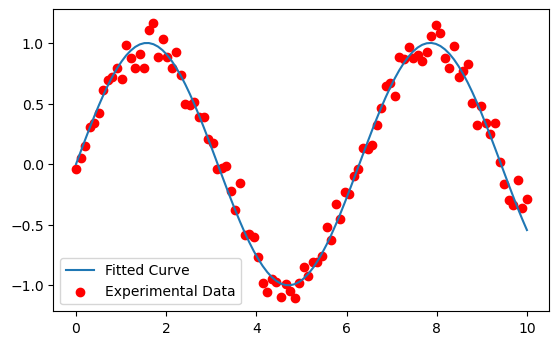

In [2]:
import customtkinter as ctk
from tkinter import Tk, StringVar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize CustomTkinter settings
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class PermeationAnalysisApp:
    def __init__(self):
        # Main Window
        self.root = Tk()
        self.root.title("Permeation Analysis Tool")
        self.root.geometry("1200x700")
        
        # ========== Sidebar ==========
        self.sidebar = ctk.CTkFrame(self.root, width=250, corner_radius=0)
        self.sidebar.pack(side="left", fill="y")
        
        # Sidebar Title
        ctk.CTkLabel(self.sidebar, text="Permeation", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=(20,0))
        ctk.CTkLabel(self.sidebar, text="Analyser", font=ctk.CTkFont(size=24, weight="bold")).pack(pady=(0,20))
        
        # Model Selection Frame
        self.model_frame = ctk.CTkFrame(self.sidebar)
        self.model_frame.pack(fill="x", padx=10, pady=5)
        
        # Model Selection Label
        ctk.CTkLabel(self.model_frame, text="Model Selection:", 
                    font=ctk.CTkFont(weight="bold")).pack(pady=5)
        
        # Model Selection Dropdown
        self.model_selector = ctk.CTkComboBox(
            self.model_frame,
            values=["Constant Diffusivity", "Variable FVT"],
            command=self.handle_model_selection,
            state="readonly"
        )
        self.model_selector.pack(fill="x", padx=5, pady=5)
        self.model_selector.set("Constant Diffusivity")  # Default selection
        
        # Mode Toggle Switch
        self.mode_switch = ctk.CTkSwitch(
            self.model_frame, 
            text="Fitting Mode",
            command=self.toggle_mode
        )
        self.mode_switch.pack(pady=10)

        # ========== Bottom Section ==========
        self.bottom_frame = ctk.CTkFrame(self.sidebar)
        self.bottom_frame.pack(side="bottom", fill="x", pady=20)
        
        # UI Scaling Option
        ctk.CTkLabel(self.bottom_frame, text="UI Scaling:").pack(pady=5)
        self.ui_scaling = ctk.CTkComboBox(self.bottom_frame, values=["80%", "90%", "100%", "110%", "120%"], 
                                         state="readonly", command=self.update_scaling)
        self.ui_scaling.set("100%")
        self.ui_scaling.pack(pady=5)
        
        # Theme Switcher
        ctk.CTkLabel(self.bottom_frame, text="Theme:").pack(pady=5)
        self.theme_switch = ctk.CTkSwitch(self.bottom_frame, text="Dark Mode", command=self.toggle_theme)
        self.theme_switch.select()  # Default to Dark Mode
        self.theme_switch.pack(pady=5)
        
        # ========== Main Content Area ==========
        self.main_frame = ctk.CTkFrame(self.root)
        self.main_frame.pack(side="right", fill="both", expand=True)
        
        # Track current model
        self.current_model = "Constant Diffusivity"
        
        # Initialize content frames
        self.constant_diff_frame = ctk.CTkFrame(self.main_frame)
        self.variable_fvt_frame = ctk.CTkFrame(self.main_frame)
        
        # Initialize Model States
        self.model_states = {
            "Constant Diffusivity": {"mode": "Manual"},
            "Variable FVT": {"mode": "Manual"}
        }
        
        # Initialize Content
        self.add_content(self.constant_diff_frame, "Constant Diffusivity")
        self.add_content(self.variable_fvt_frame, "Variable FVT")
        
        # Show default content
        self.show_model("Constant Diffusivity")
    
    def add_content(self, frame, model_name):
        # Frame Containers for Dynamic Content
        manual_frame = ctk.CTkFrame(frame)
        fitting_frame = ctk.CTkFrame(frame)
        
        # Manual Mode Content
        ctk.CTkLabel(manual_frame, text=f"Manual Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        ctk.CTkButton(manual_frame, text="Generate Results", 
                     command=lambda: print(f"Manual Mode - {model_name}")).pack(pady=10)
        
        # Fitting Mode Content
        ctk.CTkLabel(fitting_frame, text=f"Fitting Mode - {model_name}", 
                    font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        results_text = ctk.CTkTextbox(fitting_frame, width=300, height=200)
        results_text.insert("0.0", "Fitting Results:\n- Parameter 1: 0.123\n- Parameter 2: 0.456\n- R²: 0.987")
        results_text.configure(state="disabled")
        results_text.pack(pady=10)
        
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="Fitted Curve")
        ax.scatter(x, y + np.random.normal(0, 0.1, len(x)), color="red", label="Experimental Data")
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=fitting_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)
        
        fitting_status = ctk.CTkProgressBar(fitting_frame, orientation="horizontal", mode="determinate")
        fitting_status.set(0.8)
        fitting_status.pack(fill="x", pady=10)
        
        # Store Frames
        frame.frames = {"Manual": manual_frame, "Fitting": fitting_frame}
        
        # Initial Mode
        self.switch_mode(frame, model_name, "Manual")

    def handle_model_selection(self, model_name):
        """Handle model selection from dropdown"""
        self.current_model = model_name
        self.show_model(model_name)
        
        # Update mode switch to match model's current mode
        current_mode = self.model_states[model_name]["mode"]
        self.mode_switch.select() if current_mode == "Fitting" else self.mode_switch.deselect()

    def show_model(self, model_name):
        """Switch displayed model content"""
        # Hide all frames
        self.constant_diff_frame.pack_forget()
        self.variable_fvt_frame.pack_forget()
        
        # Show selected model
        if model_name == "Constant Diffusivity":
            self.constant_diff_frame.pack(fill="both", expand=True)
        else:
            self.variable_fvt_frame.pack(fill="both", expand=True)

    def toggle_mode(self):
        """Toggle between Manual and Fitting modes"""
        if not self.current_model:
            return
            
        new_mode = "Fitting" if self.mode_switch.get() else "Manual"
        self.model_states[self.current_model]["mode"] = new_mode
        
        # Get corresponding frame
        frame = self.constant_diff_frame if self.current_model == "Constant Diffusivity" else self.variable_fvt_frame
        self.switch_mode(frame, self.current_model, new_mode)

    def switch_mode(self, frame, model_name, mode):
        """Switch between Manual and Fitting modes"""
        if hasattr(frame, 'current_frame'):
            frame.current_frame.pack_forget()
        frame.frames[mode].pack(fill="both", expand=True)
        frame.current_frame = frame.frames[mode]
        print(f"Switched to {mode} mode for {model_name}")
    
    def update_scaling(self, value):
        """Update UI scaling"""
        scaling = int(value.replace('%', '')) / 100
        ctk.set_widget_scaling(scaling)
        
    def toggle_theme(self):
        """Toggle between light and dark themes"""
        ctk.set_appearance_mode("Dark" if self.theme_switch.get() else "Light")
    
    def run(self):
        """Start the application"""
        self.root.mainloop()

# Run the application
if __name__ == "__main__":
    app = PermeationAnalysisApp()
    app.run()

## Option 4: Navigation Bar on the Left

In [ ]:
# Option 4: Navigation Bar on the Left

class NavBarApp(ctk.CTk):
    def __init__(self):
        super().__init__()

        self.title("Permeation Analysis Tool - Navigation Bar")
        self.geometry("1000x600")
        
        # Navigation Bar
        self.navbar = ctk.CTkFrame(self, width=200, corner_radius=0)
        self.navbar.pack(side="left", fill="y")
        
        ctk.CTkLabel(self.navbar, text="Models", font=ctk.CTkFont(size=20, weight="bold")).pack(pady=20)
        
        ctk.CTkButton(self.navbar, text="Constant Diffusivity", command=lambda: self.switch_view("Constant Diffusivity")).pack(pady=5)
        ctk.CTkButton(self.navbar, text="Variable FVT", command=lambda: self.switch_view("Variable FVT")).pack(pady=5)
        
        # Main Content Area
        self.content_frame = ctk.CTkFrame(self)
        self.content_frame.pack(side="right", fill="both", expand=True)
        
        self.constant_diff_frame = ctk.CTkFrame(self.content_frame)
        self.variable_fvt_frame = ctk.CTkFrame(self.content_frame)
        
        ctk.CTkLabel(self.constant_diff_frame, text="Constant Diffusivity Model").pack(pady=20)
        ctk.CTkLabel(self.variable_fvt_frame, text="Variable FVT Model").pack(pady=20)
        
        self.constant_diff_frame.pack(fill="both", expand=True)
        self.current_frame = self.constant_diff_frame
    
    def switch_view(self, model_name):
        self.current_frame.pack_forget()
        if model_name == "Constant Diffusivity":
            self.constant_diff_frame.pack(fill="both", expand=True)
            self.current_frame = self.constant_diff_frame
        else:
            self.variable_fvt_frame.pack(fill="both", expand=True)
            self.current_frame = self.variable_fvt_frame

# Run the application in Jupyter
app = NavBarApp()
app.mainloop()
